In [119]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import cv2
import os
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Use grayscale for simplicity
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize to fixed dimensions
            images.append(img)
            labels.append(label)
    return images, labels


In [120]:
fractured_folder = "train/train_fractured"
unfractured_folder = "train/train_notfractured"
test_fractured_folder="test/fractured"
test_unfractured_folder="test/not_fractured"

In [121]:
fractured_images, fractured_labels = load_images_from_folder(fractured_folder, label=0)
unfractured_images, unfractured_labels = load_images_from_folder(unfractured_folder, label=1)
test_fractured_images, test_fractured_labels = load_images_from_folder(test_fractured_folder, label=0)
test_unfractured_images, test_unfractured_labels = load_images_from_folder(test_unfractured_folder, label=1)


In [122]:
X_train_fractured = np.array(fractured_images)
y_train_fractured = np.array(fractured_labels)

X_train_unfractured = np.array(unfractured_images).reshape(-1,128,128,1)
#this is minority
y_train_unfractured = np.array(unfractured_labels)

X_test = np.array(test_fractured_images + test_unfractured_images).reshape((-1, 128, 128, 1))
y_test = np.array(test_fractured_labels + test_unfractured_labels)


In [128]:
import random

def augment_image(image):
    # Apply random augmentations
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), random.uniform(-20, 20), 1)
    rotated = cv2.warpAffine(image, M, (cols, rows))
    flipped = cv2.flip(rotated, random.choice([-1, 0, 1]))
    return flipped

augmented_images = []
for img in X_train_unfractured:
    augmented_images.append(augment_image(img))

X_train_unfractured_augmented = np.array(augmented_images)
X_train_unfractured_augmented=np.expand_dims(X_train_unfractured_augmented,axis=-1)
X_train_unfractured = np.array(X_train_unfractured_augmented+X_train_unfractured)

In [129]:
X_train_unfractured_augmented.shape

(280, 128, 128, 1)

In [130]:
fractured_count=len(X_train_fractured )
unfractured_count=len(X_train_unfractured)

In [131]:
print(unfractured_count)

280


In [132]:
len(y_augmented)

280

In [ ]:
from collections import Counter

# Count the number of samples in each class in y_train
class_counts = Counter(y_train_)

# Print the counts for each class
print(f"Class counts in X_train:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")


NameError: name 'y_train_' is not defined

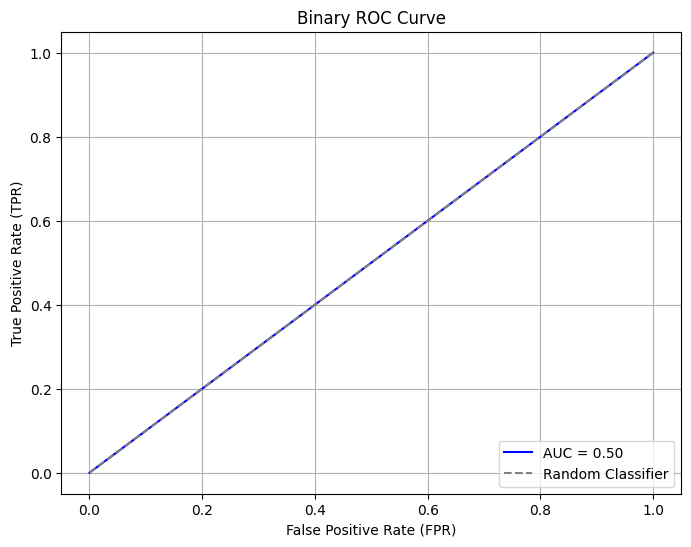

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Use the predicted probabilities directly
positive_class_probs = y_pred_probs  # No indexing needed

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, positive_class_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, positive_class_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")  # Diagonal line
plt.title("Binary ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


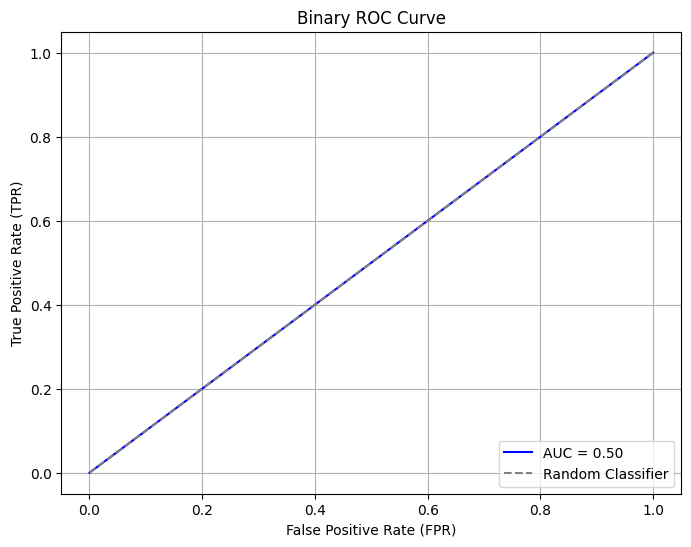

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Use the predicted probabilities directly
positive_class_probs = y_pred_probs  # No indexing needed

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, positive_class_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, positive_class_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")  # Diagonal line
plt.title("Binary ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
X_train_balanced = X_train_balanced / 255.0
X_test = X_test / 255.0

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_balanced, y_train_balanced, test_size=0.2, random_state=42
)

In [ ]:
model = Sequential([
   
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
  
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

   
    Flatten(),

   
    Dense(128, activation='relu'),
    Dropout(0.5),  

   
    Dense(1, activation='sigmoid')  
])

c:\Users\newma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,391,873 (28.20 MB)

 Trainable params: 7,391,873 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 32
epochs = 25

history = model.fit(
train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)

Epoch 1/25


c:\Users\newma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - accuracy: 0.9312 - loss: 0.0000e+00 - val_accuracy: 0.9340 - val_loss: 0.0000e+00
Epoch 2/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 285ms/step - accuracy: 0.9510 - loss: 0.0000e+00 - val_accuracy: 0.9340 - val_loss: 0.0000e+00
Epoch 3/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 259ms/step - accuracy: 0.9518 - loss: 0.0000e+00 - val_accuracy: 0.9340 - val_loss: 0.0000e+00
Epoch 4/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 255ms/step - accuracy: 0.9434 - loss: 0.0000e+00 - val_accuracy: 0.9340 - val_loss: 0.0000e+00
Epoch 5/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 257ms/step - accuracy: 0.9528 - loss: 0.0000e+00 - val_accuracy: 0.9340 - val_loss: 0.0000e+00
Epoch 6/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 257ms/step - accuracy: 0.9455 - loss: 0.0000e+00 - val_accuracy: 0.9340 - val_loss: 0.0000e+00
Epoch 7/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 264ms/step - accuracy: 0.9481 - loss: 0.0000e+00 - val_accuracy: 0.9340 - val_loss: 0.0000e+00
Epoch 8/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 259ms/step

In [ ]:
y_pred_probs = model.predict(X_test)

# Print the classification report
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred_probs, target_names=['Fractured', 'Unfractured'])
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_probs)
print("Confusion Matrix:\n", conf_matrix)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
Classification Report:
               precision    recall  f1-score   support

   Fractured       0.47      1.00      0.64       238
 Unfractured       0.00      0.00      0.00       268

    accuracy                           0.47       506
   macro avg       0.24      0.50      0.32       506
weighted avg       0.22      0.47      0.30       506

Confusion Matrix:
 [[238   0]
 [268   0]]


c:\Users\newma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\newma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\newma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


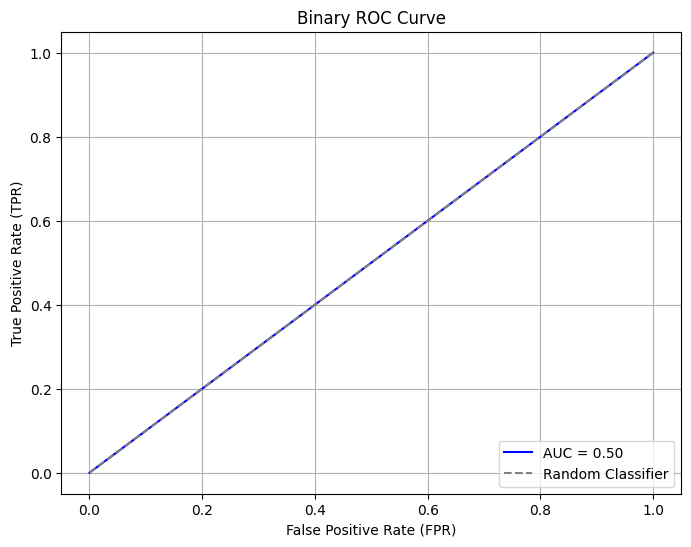

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Use the predicted probabilities directly
positive_class_probs = y_pred_probs  # No indexing needed

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, positive_class_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, positive_class_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")  # Diagonal line
plt.title("Binary ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:

print("Test set class distribution:", Counter(y_test))


Unique values in y_pred_probs: [0.]
Test set class distribution: Counter({np.int64(1): 268, np.int64(0): 238})


In [ ]:
total_params = model.count_params()
total_params

7391873

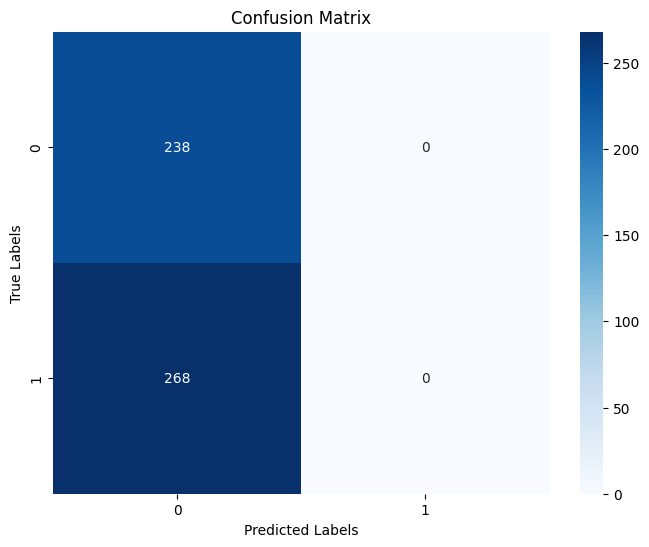

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()